In [58]:
import matplotlib.pyplot as plt 
import numpy as np 
from edes.modules.detection.detection_utils import plot, plot_ax, plot_ax_errbar, plot_errbar, big_plt_font
from scipy.constants import e, m_e, k, c
import scipy.constants as spc

mu_B = spc.physical_constants['Bohr magneton'][0]
big_plt_font()

In [6]:
## Cyclotron radius 
# Given parameters
f_c     = 20e9         # cyclotron frequency [Hz]
T = 1000
v_perp  = np.sqrt(k*T/m_e)          # perpendicular speed [m/s] (example)
E_field = 0.55*1e3 # electric field [V/m] (example)

# Derived quantities
omega_c = 2 * np.pi * f_c
B_field = (m_e * omega_c) / e

# Radii calculations
r_cyclotron = (m_e * v_perp) / (e * B_field)
v_drift     = E_field / B_field
r_magnetron = v_drift / omega_c

# Display results
print(f"Cyclotron frequency f_c  = {f_c/1e9:.1f} GHz")
print(f"Derived magnetic field B  = {B_field:.2f} T")
print(f"Cyclotron radius r_c      = {r_cyclotron*1e6:.2f} um")
print(f"Drift velocity v_d        = {v_drift:.3e} m/s")
print(f"Magnetron radius r_m      = {r_magnetron*1e6:.2f} um")

Cyclotron frequency f_c  = 20.0 GHz
Derived magnetic field B  = 0.71 T
Cyclotron radius r_c      = 0.98 um
Drift velocity v_d        = 7.698e+02 m/s
Magnetron radius r_m      = 0.01 um


In [7]:
eps = 3.747 
f0 = 30e6
c/np.sqrt(eps)/f0/4

1.2906176805324885

C:\Users\zhizh\AppData\Local\Temp\ipykernel_22416\1698556563.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels([f'{i*2*np.pi*1e9*m_e/e:.1f}' for i in ax[0].get_xticks()])
C:\Users\zhizh\AppData\Local\Temp\ipykernel_22416\1698556563.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f'$10^{(np.log10(i/1e-6)):.0f}$' for i in ax[1].get_yticks()])


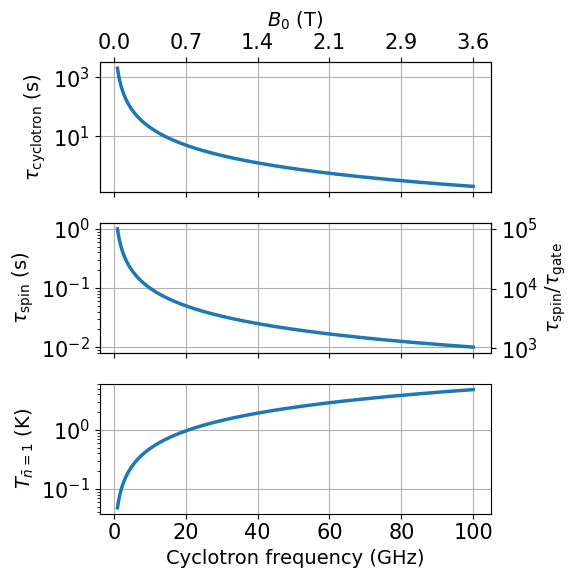

In [53]:
f_c = np.linspace(1, 100, 1000)*1e9
omega_c = f_c*2*np.pi

fig, ax = plt.subplots(nrows=3, figsize=(6,6), sharex=True)
tau = 4*np.pi*spc.epsilon_0*3*spc.m_e*spc.c**3/4/spc.e**2/omega_c**2
plot_ax(ax[0], omega_c/1e9/2/np.pi, tau, ylabel=r'$\tau_{\rm{cyclotron}}$ (s)')
ax[0].set_yscale('log')

ax0 = ax[0].twiny() 
ax0.plot(f_c/1e9, tau, alpha=0)
ax0.set_xticklabels([f'{i*2*np.pi*1e9*m_e/e:.1f}' for i in ax[0].get_xticks()])
ax0.set_xlabel(r'$B_0$ (T)')

B_field_stab = 1e-9
coherence_time = 1/(f_c*B_field_stab)
plot_ax(ax[1], f_c/1e9, coherence_time, ylabel=r'$\tau_{\rm{spin}}$ (s)')
ax1 = ax[1].twinx() 
ax[1].set_yscale('log')
ax1.plot(f_c/1e9, coherence_time, alpha=0) 
ax1.set_yticklabels([f'$10^{(np.log10(i/1e-6)):.0f}$' for i in ax[1].get_yticks()])
ax1.set_ylabel(r'$\tau_{\rm{spin}}/\tau_{\rm{gate}}$')


n = 1 
T = n*spc.hbar*omega_c/spc.k
plot_ax(ax[2], f_c/1e9, T, xlabel='Cyclotron frequency (GHz)', ylabel=r'$T_{\bar{n}=1}$ (K)')
ax[2].set_yscale('log')

plt.tight_layout()

In [57]:
grad_B = 

9.2740100783e-24